# [Distortion Metrics used in Digital Image Compression](https://github.com/vicente-gonzalez-ruiz/distortion_metrics)

## [Mean Square Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)

In the discrete case, the MSE is defined by:

\begin{equation}
\text{MSE}(x,y) = \frac{1}{N}\sum_{i=1}^N (x_i-y_i)^2
\end{equation}

where:
* $x$ is the original image.
* $y$ is the reconstructed image.
* $N$ is the number of pixels.

MSE expresses the average squared error between the two images $x$ and $y$. The maximum MSE is $d^2$, where $d$ is the [dynamic range](https://en.wikipedia.org/wiki/Dynamic_range) of $x$. When both images are identical, the (minimum) MSE is $0$. 

## [Root MSE (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

Defined as:

\begin{equation}
\text{RMSE}(x,y) = \sqrt{\text{MSE}(x,y)}
\end{equation}

where:
* $x$ is the original image.
* $y$ is the reconstructed image.

RMSE is similar to MSE, except that the [dynamic range](https://en.wikipedia.org/wiki/Dynamic_range) of the metric adapted to the dynamic range of the images. So, the maximum MSE is $d$ and the minimum MSE is $0$.

## [Signal to Noise Ratio (SNR)](https://en.wikipedia.org/wiki/Signal-to-noise_ratio)

Defined by:

\begin{equation}
\text{SNR}(x,y) = 10\log_{10}\frac{\sigma^2}{\text{MSE}(x,y)}
\end{equation}

where
$\sigma$ is the variance of $x$.

The SNR is the [ratio](https://en.wikipedia.org/wiki/Ratio) between an estimation of the [power](https://en.wikipedia.org/wiki/Energy_(signal_processing) of $x$ and a estimation power of $y$. The minimum value for the SNR is obtained when the MSE is $\sigma^2=\sigma^2$, i.e., the SNR cannot be smaller than $\log_{10}1$ dB (decibels).

## [Peak Signal to Noise Ratio (PSNR)](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)

Defined as:

\begin{equation}
\text{PSNR}(x,y) = 10\log_{10}\frac{p^2}{\text{MSE}(x,y)}
\end{equation}

where
$p$ is the peak value of the signal (typically $255$ or $65535$, depending on the [number of bits per pixel](https://en.wikipedia.org/wiki/Color_depth) of $x$ and $y$).

As in the SNR, the PSNR is the [ratio](https://en.wikipedia.org/wiki/Ratio) between an estimation of the maximum [power](https://en.wikipedia.org/wiki/Energy_(signal_processing) of $x$ and a estimation power of $y$. The minimum value for the PSNR is obtained when the MSE is $d^2=p^2$, i.e., the PSNR cannot be smaller than $\log_{10}1$ dB (decibels). In image and video coding, the PSNR is more common that the SNR. A PSNR smaller than $20$ dB implies a big distortion in $y$, and values over $40$ dB, that $y$ becomes visually indistinguishable from $x$.

## [Structure Similarity Index Method (SSIM)](https://en.wikipedia.org/wiki/Structural_similarity)

Defined by:

\begin{equation}
\hbox{SSIM}(x,y) = \frac{(2\mu_x\mu_y + c_1)(2\sigma_{xy} + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)}
\end{equation}

where:
* $\mu_x$ is the [average](https://en.wikipedia.org/wiki/Average) of $x$.
* $\mu_y$ is the average of $y$.
* $\sigma_x^2$ is the [variance](https://en.wikipedia.org/wiki/Variance) of $x$.
* $\sigma_y^2$ is the variance of $y$.
* $\sigma_{xy}$ us the [covariance](https://en.wikipedia.org/wiki/Covariance) of $x$ and $y$.
* $c_1 = (k_1L)^2$ and $c_2 = (k_2L)^2$ are two constants, being $L$ the [dynamic range](https://en.wikipedia.org/wiki/Dynamic_range) of the pixel-values (typically this is $2^b-1$ where $b$ is the [number of bits per pixel](https://en.wikipedia.org/wiki/Color_depth)), $k_1 = 0.01$ and $k_2 = 0.03$.


[Structural Similarity Index Method is a perception based model. SSIM estimates the perceived quality of images and videos.](https://m.scirp.org/papers/90911) The maximum value for the SSIM is $1$ (perfect similarity) and the minimum is $-1$ (perfect dissimilarity).

## [Pearson Correlation Coefficient (PCC)](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Defined as:

\begin{equation}
\hbox{PCC}(x,y) = \frac{\sigma_{xy}}{\sigma_x \sigma_y}
\end{equation}

where:
* $\sigma_x$ is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of $x$.
* $\sigma_y$ is the standard deviation of $y$.
* $\sigma_{xy}$ us the [covariance](https://en.wikipedia.org/wiki/Covariance) of $x$ and $y$.

The PCC is a measure of the [linear](https://en.wikipedia.org/wiki/Linearity) [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) between $x$ and $y$. The maximum value is $1$ (total positive linear correlation), $0$ means no linear correlation, and the minimum is $−1$ (total negative linear correlation).

In [1]:
import urllib.request
import math

In [2]:
try:
    import cv2
except:
    !pip3 install opencv-python --user

In [3]:
try:
    import numpy as np
except:
    !pip3 install numpy --user

In [4]:
try:
    from matplotlib import pyplot as plt
except:
    !pip3 install matplotlib --user
%matplotlib inline

In [5]:
try:
    import skimage.metrics
except:
    !pip3 install scikit-image --user

In [6]:
try:
    import scipy.stats
except:
    !pip3 install scipy --user

In [7]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
x = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]

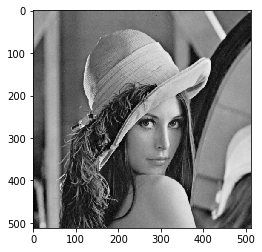

In [8]:
plt.imshow(x, cmap="gray")

In [9]:
cv2.imwrite("lena.png", x)

True

In [10]:
!convert lena.png -quality 75% lena.jpg

In [11]:
y = cv2.imread("lena.jpg", cv2.IMREAD_UNCHANGED)

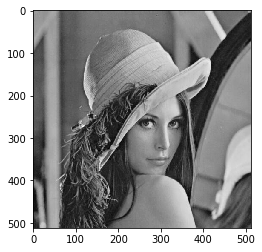

In [12]:
plt.imshow(y, cmap="gray")

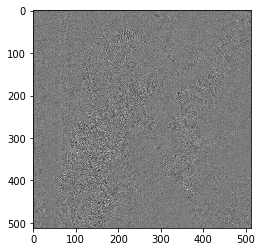

In [13]:
plt.imshow(x-y+128, cmap="gray")

In [14]:
MSE = skimage.metrics.mean_squared_error(x, y)
print(f"MSE={MSE}")

MSE=10.846168518066406


In [15]:
RMSE = math.sqrt(MSE)
print(f"RMSE={RMSE}")

RMSE=3.2933521703678164


In [16]:
SNR = skimage.metrics.peak_signal_noise_ratio(x, y, data_range=np.std(x))
print(f"SNR={SNR}dB")

SNR=23.24552322363218dB


In [17]:
PSNR = skimage.metrics.peak_signal_noise_ratio(x, y, data_range=255)
print(f"PSNR={PSNR}dB")

PSNR=37.778040130367955dB


In [18]:
SSIM = skimage.metrics.structural_similarity(x,y, data_range=y.max() - y.min())
print(f"SSIM={SSIM}")

SSIM=0.9402798903884105


In [19]:
PCC = scipy.stats.pearsonr(x.flatten(),y.flatten())[0]
print(f"PCC={PCC}")

PCC=0.9976302757615493
